# Loading data

In [526]:
import pandas as pd
import numpy as np

df=pd.read_csv('train.csv')


In [486]:
df.columns

Index(['ID', 'TIMESTAMP', 'STARTING_LATITUDE', 'STARTING_LONGITUDE',
       'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE', 'VEHICLE_TYPE',
       'TOTAL_LUGGAGE_WEIGHT', 'WAIT_TIME', 'TRAFFIC_STUCK_TIME', 'DISTANCE',
       'FARE'],
      dtype='object')

In [527]:
del df['ID']



# #Missing values

In [528]:

for c in df.columns:
    if df[c].dtypes=='int64' or  df[c].dtypes=='float64':
       df[c]=df[c].fillna(df[c].mean())
    else:
        
       df[c]=df[c].fillna(df[c].mode())

In [529]:
df.head()


,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE
0,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,Bus,15.447238,9.433605,8,34,32.09
1,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,Taxi AC,7.000000,9.000000,66,34,985.99
2,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,Taxi Non AC,18.000000,6.000000,53,1,1085.33
3,2016-04-26 18:10:09,20.111445,79.794135,28.758384,77.011422,Metro,15.447238,9.433605,54,31,56.21
4,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,bus,15.447238,9.433605,33,44,30.62


In [530]:
a=[]
b=[]
c=[]

for date in df['TIMESTAMP']:
    a.append(date.split('-')[0])
    b.append(date.split('-')[1])
    c.append(date.split('-')[2].split(' ')[0])
    

In [531]:
df['y']=a
df['m']=b
df['d']=c
del df['TIMESTAMP']

In [532]:
for c in df.columns:
    if len(df[df[c].isnull()==True][c])>0:
        print(c)
        del df[c]
        

# Encoding and scaling

In [533]:
from sklearn import preprocessing
y=df['FARE']   
del df['FARE']


for c in df.columns:
     if df[c].dtypes!='int64' and  df[c].dtypes!='float64':
       le=preprocessing.LabelEncoder().fit(df[c])
       df[c] =le.transform(df[c])
x=df

In [449]:
for i in x.columns:
    if y.corr(x[i])<0:
              print(y.corr(x[i]))
              del x[i]
    

-0.044572909129
-0.0446054801358
-0.00133704576623
-0.00528581980484
-0.00784733922401
-0.00877232866793


In [450]:
x.shape


(20000, 6)

In [520]:
from sklearn.preprocessing import StandardScaler,Normalizer
scl=StandardScaler()

x=scl.fit_transform(x)


In [344]:
x.shape
x=x[:,[0,2,4,6,7,8]]

In [159]:
y.shape
x[:,1].shape

(20000,)

In [459]:
x.shape

(20000, 7)

# Model comparision

In [534]:
from sklearn.cross_validation import train_test_split
#Xtrain = x.sample(frac=0.6, random_state=1)
#ytrain=y.loc[y.index.isin(Xtrain.index)]
#gets the left out portion of the dataset
#Xtest = x.loc[~x.index.isin(Xtrain.index)]
#ytest=y.loc[y.index.isin(Xtest.index)]
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y,test_size=0.4,)

#

In [535]:

from sklearn.preprocessing import StandardScaler,Normalizer
scl=StandardScaler()

#Xtrain=scl.fit_transform(Xtrain)

#Xtest=scl.fit_transform(Xtest)


Compare(Xtrain, Xtest, ytrain, ytest) 

Random forest --- 16803.3600184 0.81100661216
Gradient Boosting  --- 17309.3183324 0.805315918408
XG Boosting  --- 16494.3480278 0.814482180316
Linear  --- 74488.9372895 0.162196334574


In [378]:
def Compare(Xtrain, Xtest, ytrain, ytest):

    #Random forest
 from sklearn.ensemble import RandomForestRegressor
 rf=RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                         
                         min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                         bootstrap=True, oob_score=False, n_jobs=2, random_state=None, verbose=0, warm_start=False)

 rf.fit(Xtrain,ytrain)
 y_pred=rf.predict(Xtest)
 y_pred
 from sklearn.metrics import mean_squared_error,r2_score
 mse=mean_squared_error(ytest,y_pred)
 print("Random forest","---",mse,r2_score(ytest,y_pred))

 #Gradient
 from sklearn.ensemble import GradientBoostingRegressor
 reg=GradientBoostingRegressor(loss='ls', learning_rate=0.2, n_estimators=100, subsample=1.0,
                              criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                              min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, 
                              alpha=0.1,
                              verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
 reg.fit(Xtrain,ytrain)
 y_pred=reg.predict(Xtest)
 y_pred
 from sklearn.metrics import mean_squared_error,r2_score
 mse=mean_squared_error(ytest,y_pred)

 print("Gradient Boosting ","---",mse,r2_score(ytest,y_pred))

 #XGBOOSt
 import xgboost
 # Let's try XGboost algorithm to see if we can get better results
 xgb = xgboost.XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', nthread=-1, gamma=0, 
                           
                           min_child_weight=1,
                           max_delta_step=0, subsample=1,
                           colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                           base_score=0.5, seed=0, missing=None)
 xgb.fit(Xtrain,ytrain)
 y_pred=xgb.predict(Xtest)
 y_pred
 from sklearn.metrics import mean_squared_error,r2_score
 mse=mean_squared_error(ytest,y_pred)
 print("XG Boosting ","---",mse,r2_score(ytest,y_pred))


 #linear regression
 from sklearn.linear_model import LinearRegression
 reg=LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
 reg.fit(Xtrain,ytrain)
 y_pred=reg.predict(Xtest)

 from sklearn.metrics import mean_squared_error,r2_score
 mse=mean_squared_error(ytest,y_pred)
 print("Linear ","---",mse,r2_score(ytest,y_pred))

In [69]:
from sklearn.decomposition import PCA
p=PCA(n_components=df.shape[1]-1, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
p.fit(x)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
v=p.explained_variance_
v=np.round(v,1)
v

array([ 2.4,  1.6,  1.4,  1. ,  1. ,  1. ,  0.5,  0. ])

In [71]:
from sklearn.decomposition import PCA
p=PCA(n_components=3, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
x=p.fit(x).transform(x)
x

array([[-1.08375974, -1.05724232, -0.96459285],
       [ 0.81732916,  1.57828297,  1.92236588],
       [ 1.66472225,  0.44778864, -0.71390819],
       ..., 
       [-0.95980204, -0.93338656, -1.33012158],
       [-1.7518892 , -0.80563077,  0.03506602],
       [-1.86964098, -1.13042683,  1.32797515]])

In [56]:
x

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [111]:
import matplotlib.pyplot as mlt

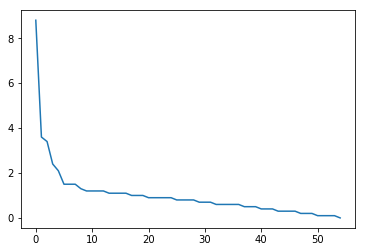

In [112]:
mlt.plot(v)

In [98]:
df.shape

(1460, 65)

# Preparing models

In [ ]:
#Random forest

In [178]:
from sklearn.ensemble import RandomForestRegressor

    
rf=RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                         
                         min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                         bootstrap=True, oob_score=False, n_jobs=2, random_state=None, verbose=0, warm_start=False)

rf.fit(Xtrain,ytrain)
y_pred=rf.predict(Xtest)
y_pred
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,y_pred)
print(mse,r2_score(ytest,y_pred))

16812.3781986 0.817647014774


In [ ]:
#gradient


In [135]:
from sklearn.ensemble import GradientBoostingRegressor
mse=100000000000000000
r2=-111111111
for i in range(1 , 10):
 ba=GradientBoostingRegressor(loss='ls', learning_rate=i/100
                             , n_estimators=1000, subsample=1.0,
                              criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                              min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, 
                              alpha=0.1,
                              verbose=0, max_leaf_nodes=2, warm_start=False, presort='auto')
 ba.fit(Xtrain,ytrain)
 y_pred=ba.predict(Xtest)
 
 from sklearn.metrics import mean_squared_error,r2_score
 if r2_score(ytest,y_pred)>r2 :
          mse=mean_squared_error(ytest,y_pred)
          v=i
          r2=r2_score(ytest,y_pred)
       

  #if r2_score(ytest,y_pred)>.88:
    
print(mse,r2,i)




27924.6879551 0.679154823145 9


In [ ]:
#xgboost

In [244]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score
mse=10000000000000
r2=-1000
import xgboost
for k in range(1,5):
   
    # Let's try XGboost algorithm to see if we can get better results
       xgb = xgboost.XGBRegressor(max_depth=k, learning_rate=k/100
                             , n_estimators=k*100, silent=True, objective='reg:linear', nthread=1, gamma=0, 
                           
                           min_child_weight=1,
                           max_delta_step=0, subsample=1,
                           colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=2, scale_pos_weight=2, 
                           base_score=0.1, seed=0, missing=None)
       xgb.fit(Xtrain,ytrain)
       y_pred=xgb.predict(Xtest)
    
       if r2_score(ytest,y_pred)>r2 :
          mse=mean_squared_error(ytest,y_pred)
          v=k
          r2=r2_score(ytest,y_pred)
       

  #if r2_score(ytest,y_pred)>.88:
    
print(mse,r2,v)


13379.4748626 0.84814303004 4


In [550]:
xgb = xgboost.XGBRegressor(max_depth=7, learning_rate=.01
                             , n_estimators=1000, silent=True, objective='reg:linear', nthread=2, gamma=0, 
                           
                           min_child_weight=1,
                           max_delta_step=0, subsample=1,
                           colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=2, scale_pos_weight=2, 
                           base_score=0.1, seed=0, missing=None)
xgb.fit(Xtrain,ytrain)
y_pred=xgb.predict(Xtest)
    

mse=mean_squared_error(ytest,y_pred)
r2=r2_score(ytest,y_pred)
print(mse,r2)

15666.8439687 0.823789413834


In [540]:
Xtrain.shape

(12000, 12)

# prediction

In [423]:
df1=pd.read_csv('test.csv')
df1.head()

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE
0,1,2016-07-19 06:56:22,28.666631,77.092389,28.642983,77.048942,metro,NaN,NaN,10,17
1,2,2016-01-10 16:56:22,12.863124,77.465198,12.983202,77.495464,metro,NaN,NaN,28,27
2,3,2015-07-14 09:49:33,19.203644,72.861170,19.161556,72.839699,ac bus,NaN,NaN,34,45
3,4,2015-03-24 10:06:18,28.668365,77.030327,28.705053,77.080778,Metro,NaN,NaN,17,14
4,5,2016-04-05 23:03:14,13.050678,80.212654,13.118577,80.234702,Mini bus,NaN,NaN,9,10


In [282]:
df1=pd.read_csv('test.csv')
Ids=df1['ID']
del df1['ID']
del df1['TIMESTAMP']
df1.head()

,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE
0,28.666631,77.092389,28.642983,77.048942,metro,NaN,NaN,10,17
1,12.863124,77.465198,12.983202,77.495464,metro,NaN,NaN,28,27
2,19.203644,72.861170,19.161556,72.839699,ac bus,NaN,NaN,34,45
3,28.668365,77.030327,28.705053,77.080778,Metro,NaN,NaN,17,14
4,13.050678,80.212654,13.118577,80.234702,Mini bus,NaN,NaN,9,10


In [283]:
#Missing values
for c in df1.columns:
    if df1[c].dtypes=='int64' or  df1[c].dtypes=='float64':
       df1[c]=df1[c].fillna(df1[c].mean())
    else:
        
       df1[c]=df1[c].fillna(df1[c].mode())

In [284]:
df1.head()

,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE
0,28.666631,77.092389,28.642983,77.048942,metro,15.441366,9.604112,10,17
1,12.863124,77.465198,12.983202,77.495464,metro,15.441366,9.604112,28,27
2,19.203644,72.861170,19.161556,72.839699,ac bus,15.441366,9.604112,34,45
3,28.668365,77.030327,28.705053,77.080778,Metro,15.441366,9.604112,17,14
4,13.050678,80.212654,13.118577,80.234702,Mini bus,15.441366,9.604112,9,10


In [285]:
 
for c in df1.columns:
     if df1[c].dtypes!='int64' and  df1[c].dtypes!='float64':
       le=preprocessing.LabelEncoder().fit(df1[c])
       df1[c] =le.transform(df1[c])
x11=df1

In [286]:
x11.head()

,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE
0,28.666631,77.092389,28.642983,77.048942,17,15.441366,9.604112,10,17
1,12.863124,77.465198,12.983202,77.495464,17,15.441366,9.604112,28,27
2,19.203644,72.861170,19.161556,72.839699,14,15.441366,9.604112,34,45
3,28.668365,77.030327,28.705053,77.080778,7,15.441366,9.604112,17,14
4,13.050678,80.212654,13.118577,80.234702,9,15.441366,9.604112,9,10


In [287]:
from sklearn.preprocessing import StandardScaler,Normalizer
scl=StandardScaler()

x11=scl.fit_transform(x11)
x11

array([[  1.44670874e+00,  -5.26800018e-01,   1.44277001e+00, ...,
          5.76841790e-16,  -9.15798059e-01,  -1.20376539e+00],
       [ -1.23547120e+00,  -4.51704044e-01,  -1.21550135e+00, ...,
          5.76841790e-16,  -7.41685964e-02,  -2.86327711e-01],
       [ -1.59354640e-01,  -1.37910646e+00,  -1.66716472e-01, ...,
          5.76841790e-16,   2.06374558e-01,   1.36506010e+00],
       ..., 
       [ -1.20780250e+00,   9.46132306e-02,  -1.22122079e+00, ...,
          5.76841790e-16,   6.61029807e-02,   2.64134894e-01],
       [ -1.71678559e-01,  -1.37762311e+00,  -1.58484882e-01, ...,
          5.76841790e-16,   1.46881875e+00,   1.45680387e+00],
       [ -1.20966773e+00,   1.00351851e-01,  -1.23284724e+00, ...,
          5.76841790e-16,  -5.41740520e-01,  -7.45046549e-01]])

In [253]:

x11.shape

(20000, 9)

In [362]:


y_pred=xgb.predict(x11)
y_pred


array([  59.56346512,   32.73630524,  117.97338104, ...,   73.82238007,
        238.2144165 ,  128.77302551], dtype=float32)

In [189]:
############
sub=pd.read_csv('intracity-fare-sample-submission.csv')
sub.head()

,ID,FARE
0,1,231.00
1,2,38.88
2,3,68.57
3,4,53.48
4,5,160.00


In [292]:
result=pd.DataFrame()
result['ID']=Ids
result['FARE']=y_pred
result.to_csv('Submission_Ankit_Srivastava.csv',index=False)

In [293]:
result.to_csv('Submission_Ankit_Srivastava.csv',index=False)


In [294]:
dfr=pd.read_csv('Submission_Ankit_Srivastava.csv',)
dfr.head()

,ID,FARE
0,1,67.557129
1,2,39.091732
2,3,116.715378
3,4,47.248512
4,5,65.884506
